# Data Load


In [248]:
import numpy as np
import pandas as pd

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
#%matplotlib tk

#import matplotlib 
#matplotlib.font_manager._rebuild()

In [250]:
# 한글 폰트가 깨지면 실행하세요! 
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths = None, fontext='ttf')
# 아래 주석을 지워서 폰트 리스트를 확인하고 한글 폰트를 font_path에 추가합니다
fontlist[:]

from matplotlib import font_manager, rc
font_path = 'C:\\Users\\mtang\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare.ttf'
#font_path = 'C:\\WINDOWS\\Fonts\\NanumGothicLight.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [251]:
path = "./Dataset/"

data = pd.read_csv(path+"kwproja_data.csv")

# original data -> data
data

,date,shop_code,shop_name,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
0,201703,95662180105,닥터빈스,음식,카페 일반,126.927911,37.558043,5.696400e+06,9982,9.58,...,17.15,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00
1,201703,1140530114,전주식당,음식,한정식/백반 전문점,127.022532,37.506856,8.496120e+06,14503,5.08,...,19.38,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00
2,201703,43562400602,삼육가,음식,고기구이 전문점,127.025013,37.505696,1.036515e+08,72527,10.51,...,21.18,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89
3,201702,43562400602,삼육가,음식,고기구이 전문점,127.025013,37.505696,9.678575e+07,70225,12.10,...,26.08,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45
4,201702,88958530107,아디다스퍼포먼스타임스퀘어,소매,스포츠용품 판매,126.903306,37.517063,1.266359e+08,91884,15.04,...,16.44,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153390,201801,45688770211,(주)스위틀,학문/교육,학원-기타,127.040033,37.525081,2.277527e+07,1114250,0.00,...,26.48,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00
153391,201712,65130960211,젤 에스테틱,소매,화장품 판매,127.046604,37.524470,1.555300e+06,33556,0.00,...,5.30,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00
153392,201712,708600354,카카오아이엑스 주식회사,소매,장난감/오락기기/용품 판매,127.060835,37.509203,3.134106e+08,39543,31.27,...,13.02,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00
153393,201712,51363910128,월드타워약국,의료,약국,127.103491,37.513101,7.927725e+07,9874,23.15,...,10.42,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00


# EDA 

153395 rows X 31 columns

- 매장 속성 정보
  - shop_code -> 식별자 feature, input feature로는 사용하지 않지만 분류를 위해서는 사용할 수 있을 것 같음  
  - shop_name -> input feature로는 사용하지 않음 (NLP deep learning 가능성 있음)
  - longtitude : 경도, latitude : 위도 -> 매장 위치 (회사 근처, 학교 근처 등 매출 영향성 있음) -> 군집화, labeling 필요
  - shop_type_big -> 13 category  -> 업종 (매출 영향성 있음)
  - shop_type_small -> 367 category

- 매출 정보
  - date -> 12 category, 201702~ 201801 까지의 data
  - monthly_gain / avearge_sale_price = 한달 총 판매수

- 매출 통계 정보
  - weekday0~6 : 일 ~ 월
  - time -> 05_10 / 10_14 / 14_18 / 18_20 / 20_22 / 22_24 / 24_05 => 시간대가 동일하지 않음
    - 새벽대는 찾는 손님 적어 시간 길게 잡았을 것
    - 저녁 시간대는 가장 매출이 많이 이뤄지는 prime time 이라 시간대를 짧게 잡았을 것
  - female/male : 20/30/40/50 -> 8 columns

##### monthly_gain과 average_sale_price 중 어느 것을 y값으로 둘 것인가? 
- 월매출 예측 문제로 가정하고 montly_gain 을 y값으로 예측하는 모델 만들기

##### shop_code는 input feature에 넣어야 하는가?
- 특별한 브랜드가 y값을 결정하는 과적합 요소가 될 수 있으므로
- X 에서 shop code, shop name 제외하는 것도 방법
- 어느 위치에 어떤 업종으로 어떤 객단가인 매장을 오픈하면 월매출이 어떻게 될까? 문제
 - X: shop type big, shop type small, longitude, latitude, avg_sale_price, 
 - y: montly_gain

In [252]:
data.columns

Index(['date', 'shop_code', 'shop_name', 'shop_type_big', 'shop_type_small',
       'longitude', 'latitude', 'monthly_gain', 'average_sale_price',
       'female_20', 'female_30', 'female_40', 'female_50', 'male_20',
       'male_30', 'male_40', 'male_50', 'weekday0', 'weekday1', 'weekday2',
       'weekday3', 'weekday4', 'weekday5', 'weekday6', 'time_05_10',
       'time_10_14', 'time_14_18', 'time_18_20', 'time_20_22', 'time_22_24',
       'time_00_05'],
      dtype='object')

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153395 entries, 0 to 153394
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                153395 non-null  int64  
 1   shop_code           153395 non-null  int64  
 2   shop_name           153395 non-null  object 
 3   shop_type_big       148927 non-null  object 
 4   shop_type_small     148927 non-null  object 
 5   longitude           153395 non-null  float64
 6   latitude            153395 non-null  float64
 7   monthly_gain        153395 non-null  float64
 8   average_sale_price  153395 non-null  int64  
 9   female_20           153395 non-null  float64
 10  female_30           153395 non-null  float64
 11  female_40           153395 non-null  float64
 12  female_50           153395 non-null  float64
 13  male_20             153395 non-null  float64
 14  male_30             153395 non-null  float64
 15  male_40             153395 non-nul

# Preprocessing
- missing value 제거 
    - monthly_gain : 3,605 제거 -> 149,790
    - shop_type_big : 4,303 제거 -> 145,487 
    - gender feature : 1,187 -> 144,300
- shop_code, shop_name : 식별자 feature 이므로 drop 
- date : 아직은 쓸 수 없으므로 drop
    - 여기까지 총 144,300 X 27
- shop_type_big(13), shop_type_small(367) : label encodding
- longitude, latitude : clustering을 통해 labeling 후 해당 두 열은 drop 
- MinMaxSaclar 정규화 -> 정규화 column의 범위는??

In [254]:
# 원본 data와 따로 관리 -> original data = data, input data = input_data 
# feature drop
input_data = data.copy()
input_data = input_data.drop(['date', 'shop_code', 'shop_name'], axis=1)
#input_data

In [255]:
# missing value drop - monthly_gain
null_index = input_data[input_data['monthly_gain']==0].index 
#print(len(drop_index)) -> 3605

input_data = input_data.drop(null_index)
#input_data

In [256]:
# missing value drop - shop_type_big
null_index = input_data[input_data['shop_type_big'].isnull()==True].index
input_data = input_data.drop(null_index)
#input_data

In [257]:
# There is no "null" in "shop_type_small" feature 

#print(df_check['shop_type_small'].unique())
print(len(input_data['shop_type_small'].unique()))
print(input_data['shop_type_small'].isnull().value_counts())

367
False    145487
Name: shop_type_small, dtype: int64


In [258]:
input_data[input_data[['female_20', 'female_30', 'female_40', 'female_50', 'male_20',
       'male_30', 'male_40', 'male_50']].sum(axis=1)==0]

,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
221,음식,기타일반 유흥주점,127.034695,37.527644,1257500.0,250000,0.0,0.0,0.0,0.0,...,100.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,100.00
287,도매/유통/무역,철강판재 도매,126.904171,37.515872,622715.5,123310,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.00,0.00,100.0,0.0,0.0,0.00,0.00
296,소매,선물용품 판매,126.930103,37.555125,603600.0,120000,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.00,0.00,100.0,0.0,0.0,0.00,0.00
538,소매,신발 판매,126.984743,37.563528,523120.0,104000,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.00,0.00,100.0,0.0,0.0,0.00,0.00
748,소매,슈퍼마켓 체인점,126.923453,37.556142,4471670.0,80818,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,78.63,21.37,0.0,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153239,소매,꽃집/꽃배달,127.024831,37.524013,1802500.0,350000,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.00,0.00,100.0,0.0,0.0,0.00,0.00
153259,소매,가전제품 소매,127.098024,37.511472,2571910.0,499400,0.0,0.0,0.0,0.0,...,100.00,0.00,0.0,0.00,100.00,0.0,0.0,0.0,0.00,0.00
153293,소매,꽃집/꽃배달,127.024612,37.520046,1609650.0,315000,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.00,100.00,0.0,0.0,0.0,0.00,0.00
153301,의료,병원-성형외과,127.027963,37.523336,45114000.0,8760000,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.00,100.00,0.0,0.0,0.0,0.00,0.00


In [259]:
# missing value drop - gender feature 
# So we finally get 144,300 x 28 data 

null_index = input_data[input_data[['female_20', 'female_30', 'female_40', 'female_50', 'male_20',
       'male_30', 'male_40', 'male_50']].sum(axis=1)==0].index
input_data = input_data.drop(null_index).reset_index().drop('index', axis=1)
input_data

,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
0,음식,카페 일반,126.927911,37.558043,5.696400e+06,9982,9.58,5.43,18.68,4.63,...,17.15,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00
1,음식,한정식/백반 전문점,127.022532,37.506856,8.496120e+06,14503,5.08,12.12,9.68,8.15,...,19.38,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00
2,음식,고기구이 전문점,127.025013,37.505696,1.036515e+08,72527,10.51,9.64,4.05,3.57,...,21.18,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89
3,음식,고기구이 전문점,127.025013,37.505696,9.678575e+07,70225,12.10,11.48,6.31,4.77,...,26.08,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45
4,소매,스포츠용품 판매,126.903306,37.517063,1.266359e+08,91884,15.04,10.48,16.90,9.56,...,16.44,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144295,학문/교육,학원-기타,127.040033,37.525081,2.277527e+07,1114250,0.00,0.00,25.35,22.82,...,26.48,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00
144296,소매,화장품 판매,127.046604,37.524470,1.555300e+06,33556,0.00,0.00,46.48,44.72,...,5.30,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00
144297,소매,장난감/오락기기/용품 판매,127.060835,37.509203,3.134106e+08,39543,31.27,14.62,9.13,2.91,...,13.02,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00
144298,의료,약국,127.103491,37.513101,7.927725e+07,9874,23.15,18.09,9.60,9.93,...,10.42,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00


In [260]:
# issue -> shop_type_big에 관한 2번째 issue를 참고하세요!
# issue -> '음식'과 '음식 ' 두 개로 count 되고 있습니다. 아래 코드로 수정하시길 바랍니다

input_data.loc[input_data['shop_type_big'] == '음식 ', 'shop_type_big'] = '음식'
print(input_data['shop_type_big'].nunique())
print(input_data['shop_type_big'].unique())

13
['음식' '소매' '의료' '숙박' '관광/여가/오락' '학문/교육' '생활서비스' '스포츠' '도매/유통/무역' '제조'
 '부동산' '전자/정보통신' '기술서비스']


In [261]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

input_data['shop_type_big'] = le.fit_transform(list(input_data['shop_type_big']))   # fit transform으로 한번에 처리 가능
le.classes_

array(['관광/여가/오락', '기술서비스', '도매/유통/무역', '부동산', '생활서비스', '소매', '숙박', '스포츠',
       '음식', '의료', '전자/정보통신', '제조', '학문/교육'], dtype='<U8')

In [262]:
le = LabelEncoder()

input_data['shop_type_small'] = le.fit_transform(list(input_data['shop_type_small'])) 
#le.classes_

In [263]:
# Labeling - KMeans Clustering 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9).fit(input_data[['latitude', 'longitude']])
kmeans.cluster_centers_
kmeans.labels_

array([2, 0, 0, ..., 5, 6, 6])

In [264]:
# longitude + latitude = geo 
# So we get inpute_data = 144,300 X 27
input_data['geo'] = kmeans.labels_
input_data = input_data.drop(['longitude', 'latitude'], axis=1)
input_data

,shop_type_big,shop_type_small,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,male_20,male_30,...,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05,geo
0,8,304,5.696400e+06,9982,9.58,5.43,18.68,4.63,27.62,8.89,...,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00,2
1,8,346,8.496120e+06,14503,5.08,12.12,9.68,8.15,9.68,9.75,...,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00,0
2,8,17,1.036515e+08,72527,10.51,9.64,4.05,3.57,23.30,31.56,...,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89,0
3,8,17,9.678575e+07,70225,12.10,11.48,6.31,4.77,15.64,30.60,...,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45,0
4,5,170,1.266359e+08,91884,15.04,10.48,16.90,9.56,21.64,11.67,...,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144295,12,323,2.277527e+07,1114250,0.00,0.00,25.35,22.82,0.00,26.48,...,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00,8
144296,5,357,1.555300e+06,33556,0.00,0.00,46.48,44.72,0.00,0.00,...,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00,8
144297,5,257,3.134106e+08,39543,31.27,14.62,9.13,2.91,19.56,12.47,...,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00,5
144298,9,190,7.927725e+07,9874,23.15,18.09,9.60,9.93,11.81,10.03,...,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00,6


In [265]:
# Normalization
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer

scale_range = input_data['shop_type_big'].nunique()
for s in range(0, scale_range) : 
    scale_data = pd.DataFrame(input_data[input_data['shop_type_big'] == s]['average_sale_price'])
    scaled_data = pd.DataFrame(np.log1p(scale_data))
    input_data.loc[scale_data.index, 'average_sale_price'] = scaled_data
    
input_data

,shop_type_big,shop_type_small,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,male_20,male_30,...,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05,geo
0,8,304,5.696400e+06,9.208639,9.58,5.43,18.68,4.63,27.62,8.89,...,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00,2
1,8,346,8.496120e+06,9.582180,5.08,12.12,9.68,8.15,9.68,9.75,...,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00,0
2,8,17,1.036515e+08,11.191728,10.51,9.64,4.05,3.57,23.30,31.56,...,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89,0
3,8,17,9.678575e+07,11.159474,12.10,11.48,6.31,4.77,15.64,30.60,...,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45,0
4,5,170,1.266359e+08,11.428293,15.04,10.48,16.90,9.56,21.64,11.67,...,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144295,12,323,2.277527e+07,13.923693,0.00,0.00,25.35,22.82,0.00,26.48,...,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00,8
144296,5,357,1.555300e+06,10.421001,0.00,0.00,46.48,44.72,0.00,0.00,...,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00,8
144297,5,257,3.134106e+08,10.585169,31.27,14.62,9.13,2.91,19.56,12.47,...,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00,5
144298,9,190,7.927725e+07,9.197762,23.15,18.09,9.60,9.93,11.81,10.03,...,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00,6


In [235]:
scale_data = pd.DataFrame(input_data['average_sale_price'])
scaled_data = pd.DataFrame(np.log1p(scale_data))
input_data['average_sale_price'] = scaled_data

input_data

,shop_type_big,shop_type_small,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,male_20,male_30,...,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05,geo
0,8,304,15.555345,9.208639,9.58,5.43,18.68,4.63,27.62,8.89,...,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00,2
1,8,346,15.955120,9.582180,5.08,12.12,9.68,8.15,9.68,9.75,...,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00,3
2,8,17,18.456545,11.191728,10.51,9.64,4.05,3.57,23.30,31.56,...,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89,3
3,8,17,18.388010,11.159474,12.10,11.48,6.31,4.77,15.64,30.60,...,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45,3
4,5,170,18.656826,11.428293,15.04,10.48,16.90,9.56,21.64,11.67,...,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144295,12,323,16.941186,13.923693,0.00,0.00,25.35,22.82,0.00,26.48,...,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00,8
144296,5,357,14.257180,10.421001,0.00,0.00,46.48,44.72,0.00,0.00,...,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00,8
144297,5,257,19.563025,10.585169,31.27,14.62,9.13,2.91,19.56,12.47,...,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00,7
144298,9,190,18.188462,9.197762,23.15,18.09,9.60,9.93,11.81,10.03,...,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00,4


<AxesSubplot:xlabel='shop_type_big', ylabel='average_sale_price'>

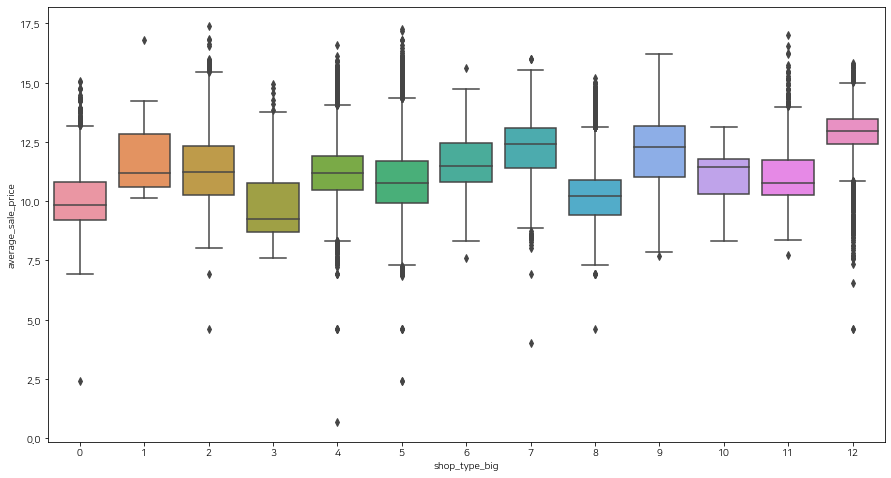

In [236]:
rcParams['figure.figsize'] = 15,8
sns.boxplot(x='shop_type_big', y='average_sale_price', data=input_data)

C:\Users\mtang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


10.308986    336
10.819798    333
9.903538     289
11.512935    262
10.596660    237
            ... 
11.188566      1
12.031052      1
12.314290      1
9.382612       1
10.071330      1
Name: average_sale_price, Length: 79694, dtype: int64


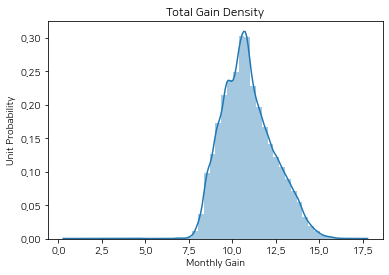

In [266]:
ax = plt.subplots()
ax = sns.distplot(input_data['average_sale_price'], hist=True)
ax.set_title('Total Gain Density')
ax.set_xlabel('Monthly Gain')
ax.set_ylabel('Unit Probability')
print(input_data['average_sale_price'].value_counts())

# Data Split

In [267]:
input_data_y = input_data['monthly_gain'].copy()
input_data_X = input_data.drop(['monthly_gain'], axis=1)
#input_data_y = scaler.inverse_transform(pd.DataFrame(input_data_y))

In [268]:
from sklearn.model_selection import train_test_split

tr_val_X, test_X, tr_val_y, test_y = train_test_split(
    input_data_X, 
    input_data_y, 
    test_size = 0.2,      
    shuffle=True,         
    random_state=42)      

train_X, valid_X, train_y, valid_y = train_test_split(
    tr_val_X, 
    tr_val_y, 
    test_size = 0.2,      
    shuffle=True,         
    random_state=42) 

#true_y = scaler.inverse_transform(pd.DataFrame(test_y))
#true_y

# Modeling
- XGB
- LGBM

In [269]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, TimeSeriesSplit,GridSearchCV
from sklearn.metrics import mean_squared_error

from lightgbm import LGBMRegressor
from lightgbm import plot_importance 
from xgboost import XGBRegressor
from xgboost import plot_importance

from keras.callbacks import EarlyStopping, ModelCheckpoint

In [270]:
model_xgb = XGBRegressor()

model_xgb.fit(train_X, train_y, early_stopping_rounds=500, eval_set=[(valid_X, valid_y)],verbose=True)
pred_xgb = model_xgb.predict(test_X)
#pred_xgb = scaler.inverse_transform(pd.DataFrame(pred_xgb))

[0]	validation_0-rmse:771492800.00000
[1]	validation_0-rmse:617919296.00000
[2]	validation_0-rmse:507733184.00000
[3]	validation_0-rmse:458198592.00000
[4]	validation_0-rmse:446520480.00000
[5]	validation_0-rmse:411812384.00000
[6]	validation_0-rmse:409018272.00000
[7]	validation_0-rmse:402085408.00000
[8]	validation_0-rmse:400281920.00000
[9]	validation_0-rmse:384247072.00000
[10]	validation_0-rmse:383981568.00000
[11]	validation_0-rmse:381550432.00000
[12]	validation_0-rmse:374086592.00000
[13]	validation_0-rmse:369290496.00000
[14]	validation_0-rmse:365678336.00000
[15]	validation_0-rmse:367123744.00000
[16]	validation_0-rmse:366461280.00000
[17]	validation_0-rmse:363324768.00000
[18]	validation_0-rmse:361837728.00000
[19]	validation_0-rmse:358928192.00000
[20]	validation_0-rmse:359040000.00000
[21]	validation_0-rmse:356136576.00000
[22]	validation_0-rmse:355693280.00000
[23]	validation_0-rmse:353665120.00000
[24]	validation_0-rmse:353928544.00000
[25]	validation_0-rmse:353597120.00

In [271]:
model_lgbm = LGBMRegressor()

model_lgbm.fit(train_X, train_y, early_stopping_rounds=100, eval_set=[(valid_X, valid_y)], verbose=True)
pred_lgbm = model_lgbm.predict(test_X)
#pred_lgbm = scaler.inverse_transform(pd.DataFrame(pred_lgbm))

[1]	valid_0's l2: 6.71354e+17
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 6.17716e+17
[3]	valid_0's l2: 5.6439e+17
[4]	valid_0's l2: 5.27669e+17
[5]	valid_0's l2: 4.77525e+17
[6]	valid_0's l2: 4.37453e+17
[7]	valid_0's l2: 4.13722e+17
[8]	valid_0's l2: 3.82286e+17
[9]	valid_0's l2: 3.56117e+17
[10]	valid_0's l2: 3.34733e+17
[11]	valid_0's l2: 3.1785e+17
[12]	valid_0's l2: 3.02363e+17
[13]	valid_0's l2: 2.90972e+17
[14]	valid_0's l2: 2.80607e+17
[15]	valid_0's l2: 2.67092e+17
[16]	valid_0's l2: 2.56105e+17
[17]	valid_0's l2: 2.43004e+17
[18]	valid_0's l2: 2.30537e+17
[19]	valid_0's l2: 2.18814e+17
[20]	valid_0's l2: 2.14241e+17
[21]	valid_0's l2: 2.07141e+17
[22]	valid_0's l2: 2.02896e+17
[23]	valid_0's l2: 2.0082e+17
[24]	valid_0's l2: 1.92803e+17
[25]	valid_0's l2: 1.89277e+17
[26]	valid_0's l2: 1.81984e+17
[27]	valid_0's l2: 1.79032e+17
[28]	valid_0's l2: 1.74349e+17
[29]	valid_0's l2: 1.68897e+17
[30]	valid_0's l2: 1.65366e+17
[31]	valid_0's l2: 1

## Prediction

In [272]:
def plot_history(history):
    #hist = pd.DataFrame(history.history)
    #history['epoch'] = history.epoch
    
    plt.figure(figsize=(8,12))
    
    # Mean Abs Error : 평균 절대 오차, 측정값에서 오차의 크기로 측정값과 실제값과의 차이, 절대 오차의 평균  
    # -> 측정하고자 하는 값을 정확하게 측정하지 못함으로써 발생
    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.legend()
    
    # Mean Square Error : 평균 제곱 오차, 오차의 제복에 대한 평균을 취한 값
    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.legend()
    plt.show()
    
def show_pred(test_y, pred) :
    #true_y = test_y.to_numpy()
    #true_y = np.ravel(true_y)
    
    df_result = pd.DataFrame(list(zip(true_y, pred)), columns=['true_y', 'prediction'])
    return df_result

def show_mse_rmse(test_y, pred) :
    mse = mean_squared_error(test_y, pred)
    print("mse : %f" % mse)
    
    rmse = np.sqrt(mse)
    print("rmse: %f \n" %rmse)
    
def show_prediction_error(test_y, pred) :
    true_y = test_y.to_numpy()
    true_y = np.ravel(true_y)
    error = pred - true_y
    plt.hist(error, bins=25)
    plt.xlabel("Prediction Error")
    _ = plt.ylabel("Count")
    
def feature_importance(model_xgb) : 
    %matplotlib inline
    plt.rcParams['axes.unicode_minus'] = False
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = fm.FontProperties(fname=font_path).get_name()
    rc('font', family=font)

    fig, ax = plt.subplots(figsize=(10,12))
    plot_importance(model_xgb, ax=ax)
    
def graph(pred, test_label) :
    plt.figure(figsize=(16, 9))
    plt.plot(test_label, label = 'actual')
    plt.plot(pred, label = 'prediction')
    plt.legend()
    plt.show()

In [244]:
show_pred(true_y, pred_xgb)

,true_y,prediction
0,75750.0,11.289268
1,20662785.0,17.440735
2,1083600.0,14.106823
3,32129604.0,17.597778
4,21083082.0,16.932392
...,...,...
28855,63954000.0,17.977919
28856,9737677.6,16.362148
28857,6771669.8,16.378691
28858,2028096.0,14.714496


In [ ]:
show_pred(true_y, pred_lgbm)

In [ ]:
show_prediction_error(test_y, pred_xgb)

In [ ]:
show_prediction_error(test_y, pred_lgbm)

In [273]:
show_mse_rmse(test_y, pred_xgb)

mse : 109225649499728064.000000
rmse: 330493040.017075 



In [274]:
show_mse_rmse(test_y, pred_lgbm)

mse : 110254661891170288.000000
rmse: 332046174.335995 



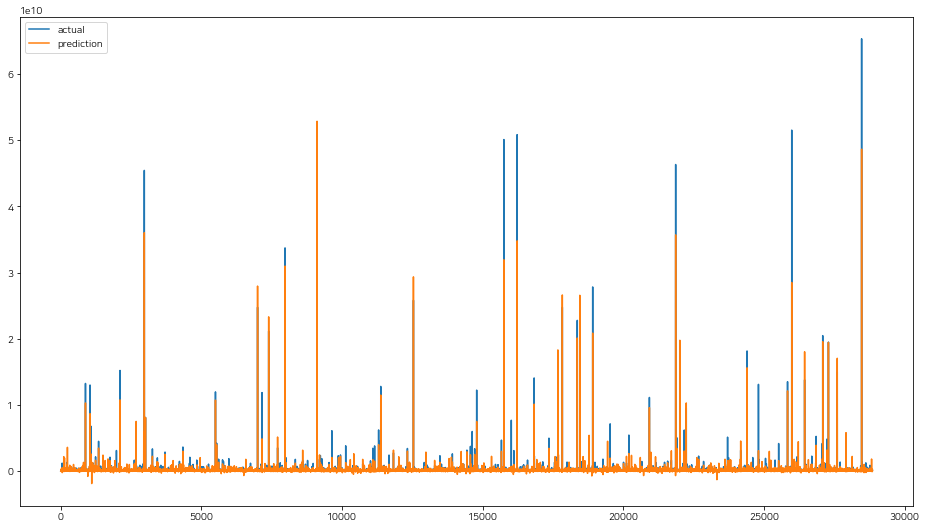

In [168]:
true_y = test_y.to_numpy()
graph(pred_xgb, true_y)

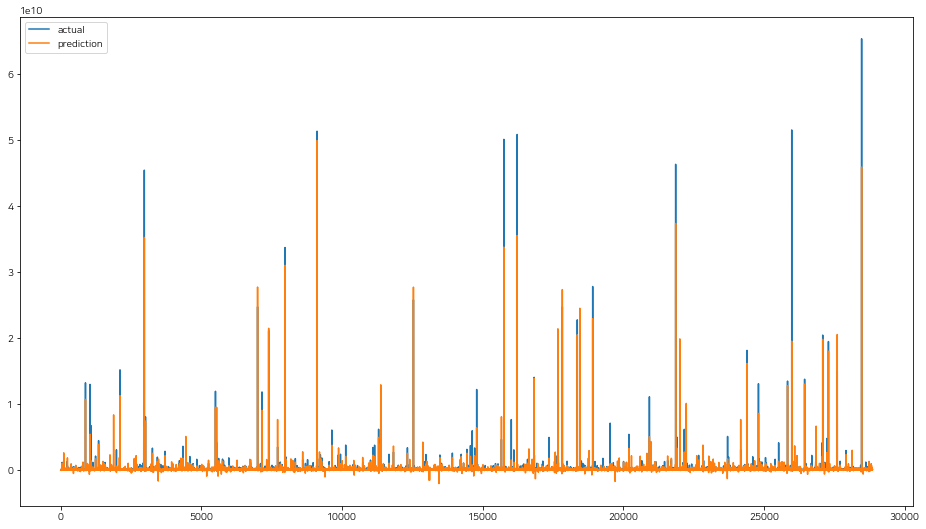

In [169]:
true_y = test_y.to_numpy()
graph(pred_lgbm, true_y)

<AxesSubplot:>

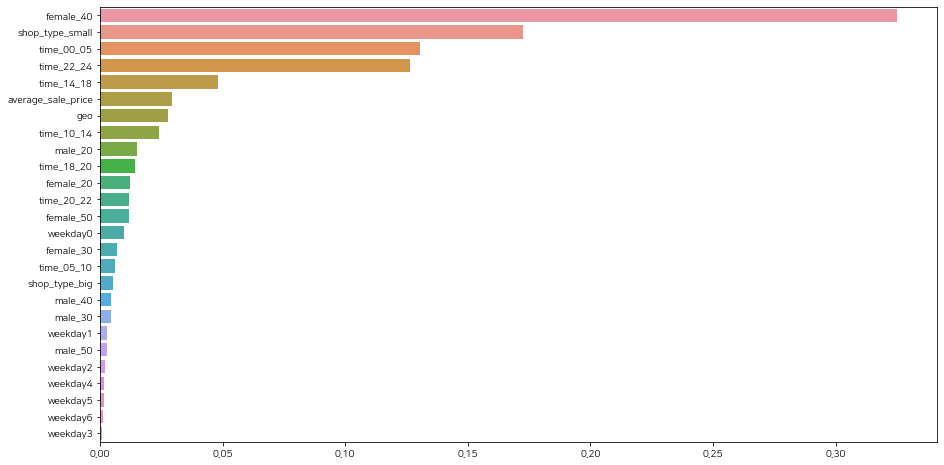

In [166]:
feature_series = pd.Series(data=model_xgb.feature_importances_, index=train_X.columns)
feature_series = feature_series.sort_values(ascending=False) 
sns.barplot(x = feature_series, y=feature_series.index)

<AxesSubplot:>

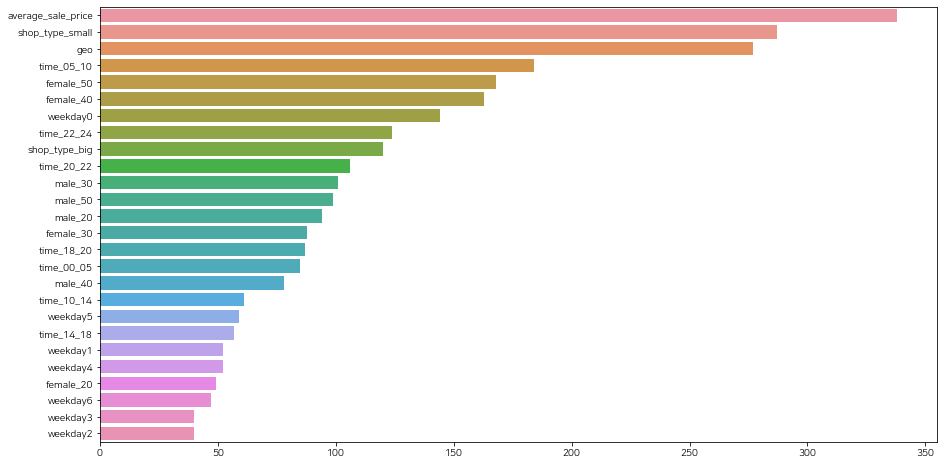

In [167]:
feature_series = pd.Series(data=model_lgbm.feature_importances_, index=train_X.columns)
feature_series = feature_series.sort_values(ascending=False) 
sns.barplot(x = feature_series, y=feature_series.index)